# Poisson MLE from scratch

## 1) Theory

This is mainly taken from https://en.wikipedia.org/wiki/Poisson_regression

- Let $Y$ denote the (count) response variable
- Let $\mathbf{x}\in \mathbb{R}^n$ be a vector of predictors

Then we can write the model as

$$
\begin{align}
\log(\mathbb{E}[Y|\mathbf{x}]) &= \alpha + \mathbf{\beta}'\mathbf{x} \\
\log(\mathbb{E}[Y|\mathbf{x}]) &= \mathbf{\theta}'\mathbf{x},
\end{align}
$$

where in the last line, $\mathbf{x}$ concatenates 1 and the previous $\mathbf{x}$ and so $\mathbf{x}\in\mathbb{R}^{n+1}$ and $\mathbf{\theta}$ is a $\alpha$ concatenated to $\mathbf{\beta}$.

Hence given a Poisson regression model $\mathbf{\theta}$ and an input vector $\mathbf{x}$, the predicted mean of the associated Poisson distribution is given by 

$$
\begin{align}
\mathbb{E}[Y|\mathbf{x}] &= \mathrm{e}^{\mathbf{\theta}'\mathbf{x}}.
\end{align}
$$

### 1.1) Maximum likelihood-based parameter estimation

Given $\mathbf{\theta}$ and $\mathbf{x}$, we have

$$
\begin{align}
\lambda := \mathbb{E}[Y|\mathbf{x}] &= \mathrm{e}^{\mathbf{\theta}'\mathbf{x}}.
\end{align}
$$

The Poisson probability mass function is therefore given by

$$
\begin{align}
p(y|x;\mathbf{\theta}) &= \frac{\lambda^y\mathrm{e}^{-\lambda}}{y!} = \frac{(\mathrm{e}^{\mathbf{\theta}'\mathbf{x}})^y\mathrm{e}^{-(\mathrm{e}^{\mathbf{\theta}'\mathbf{x}})}}{y!} = \frac{\mathrm{e}^{y\mathbf{\theta}'\mathbf{x}}\mathrm{e}^{-\mathrm{e}^{\mathbf{\theta}'\mathbf{x}}}}{y!} 
\end{align}
$$

Under independence, the probability of any particular dataset $((y_1, \mathbf{x}_1),...(y_m, \mathbf{x}_m))$ is therefore given by

$$
\begin{align}
p(y_1,...,y_m|\mathbf{x}_1,....\mathbf{x}_m) = \prod_{i=1}^m \frac{\mathrm{e}^{y_i\mathbf{\theta}'\mathbf{x}_i}\mathrm{e}^{-\mathrm{e}^{\mathbf{\theta}'\mathbf{x}_i}}}{y_i!} 
\end{align}
$$

By the method of maximum likelihood, the likelihood function is given by

$$
\begin{align}
L(\theta | X, Y) &= \prod_{i=1}^m \frac{\mathrm{e}^{y_i\mathbf{\theta}'\mathbf{x}_i}\mathrm{e}^{-\mathrm{e}^{\mathbf{\theta}'\mathbf{x}_i}}}{y_i!} 
\end{align}
$$

As usual, the log-likelihood is easier to maximize. It is given by

$$
\begin{align}
\ell(\theta|X,Y) = \log(L(\theta|X,Y)) &= \sum_{i=1}^m \left(y_i\mathbf{\theta}'\mathbf{x}_i - \mathrm{e}^{\mathbf{\theta}'\mathbf{x}_i} - \log(y_i!)\right) \\
&\propto \sum_{i=1}^m \left(y_i\mathbf{\theta}'\mathbf{x}_i - \mathrm{e}^{\mathbf{\theta}'\mathbf{x}_i}\right).
\end{align}
$$

Taking a derivative with respect to $\theta_i$, we get

$$
\begin{align}
\frac{\partial \ell(\theta| X, Y)}{\partial \theta_j} &= \sum_{i=1}^m y_ix_{ij} - x_{ij}\mathrm{e}^{\mathbf{\theta}'\mathbf{x}_i}.
\end{align}
$$


The gradient vector of the log-likelihood (score) is therefore given by

$$
\begin{align}
\nabla_\theta \ell(\theta| X, Y) &= \sum_{i=1}^m y_i \mathbf{x}_i - \mathbf{x}_i\mathrm{e}^{\mathbf{\theta}'\mathbf{x_i}} \\
 &= \sum_{i=1}^m (y_i - \mathrm{e}^{\mathbf{\theta}'\mathbf{x_i}})\mathbf{x}_i \\
 &= \sum_{i=1}^m (y_i - \hat{y}_i)\mathbf{x}_i \;\;\;\;\;\;\;\;\;\;\;\; (\text{at the MLE }\hat{\theta}).
\end{align}
$$

In vectorized form this can be written as

$$
\begin{align}
\nabla_\theta \ell(\theta| X, Y) &= \mathbf{X}'(\mathbf{y}-\mathbf{\hat{y}})
\end{align}
$$

And the Hessian is

$$
\begin{align}
H_\theta \ell(\theta|X,Y) &= \nabla_{\theta'}\left(\nabla_{\theta}\ell(\theta|X,Y) \right) \\
&= \nabla_{\theta'} \left(\sum_{i=1}^m y_i \mathbf{x}_i - \mathbf{x}_i\mathrm{e}^{\mathbf{\theta}'\mathbf{x_i}} \right) \\
&= -\sum_{i=1}^m\mathrm{e}^{\mathbf{\theta}'\mathbf{x_i}}\mathbf{x}_i\mathbf{x}_i' \\
&= -\sum_{i=1}^m\hat{y}_i\mathbf{x}_i\mathbf{x}_i' \;\;\;\;\;\;\;\;\;\;\;\; (\text{at the MLE }\hat{\theta}).
\end{align}
$$

In vectorized form this can be written as (see here: https://stats.stackexchange.com/questions/253558/poisson-regression-and-hessian ) 

$$
\begin{align}
H_\theta \ell(\theta|X,Y) &= -\mathbf{X}'\mathrm{Diag}(\mathbf{\hat{y}})\mathbf{X}
\end{align}
$$

where

$$
\begin{align}
\mathrm{Diag}(\mathbf{\hat{y}}) &= \begin{bmatrix} \mathrm{e}^{\hat{\theta}'\mathbf{x}_1} & 0 & ... & 0 \\ 
                                                    0       &  \mathrm{e}^{\hat{\theta}'\mathbf{x}_2} & ... & 0 \\
                                                    \vdots & & \ddots & \vdots \\
                                                    0 & 0 & ... & \mathrm{e}^{\hat{\theta}'\mathbf{x}_m}
                                    \end{bmatrix}.
\end{align}
$$

Recall that the asymptotic variance-covariance matrix of the MLE can be found by the inverse of the **observed** Fisher information matrix (the observed Fisher information matrix is the  negative of the second derivative of the log-likelihood evaluated at the MLE $\hat{\theta}$.). Hence the inverse of the (negative) Hessian is an estimator of the asymptotic covariance matrix ( https://stats.stackexchange.com/questions/68080/basic-question-about-fisher-information-matrix-and-relationship-to-hessian-and-s ). 

## 2) Implementation

In practice, the likelihood can be maximised with a number of algorithms. Gradient descent turns out to be unstable. Iteratively re-weighted least squares (IRLS) works much better. For the latter, see 

- https://arxiv.org/pdf/1903.01690v2.pdf
- https://gtools.readthedocs.io/en/latest/usage/gpoisson/index.html

The python class `PoissonMLE` implements both procedures and also computes the covariance matrix.

In [1]:
import numpy as np
import pandas as pd
from poisson_mle import PoissonMLE
import matplotlib.pyplot as plt
%matplotlib inline

### 2.1) Example with fake data

Data generation from here: https://towardsdatascience.com/fitting-glms-by-hand-189c02af33a8

In [2]:
np.random.seed(123)

m = 1000 
p = 9
X = np.random.standard_normal((m, p))
X = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], axis=1)
theta = np.random.randn(p+1)/2
lam = np.exp(X @ theta)
y = np.random.poisson(lam = lam).reshape(-1,1)

learning_rate = 0.0001
theta_init = np.random.standard_normal((p+1,1))

#### 2.1.1) Compute MLE with gradient descent

In [3]:
pmle = PoissonMLE(y, X)
pmle.gradient_descent(theta_init, learning_rate)

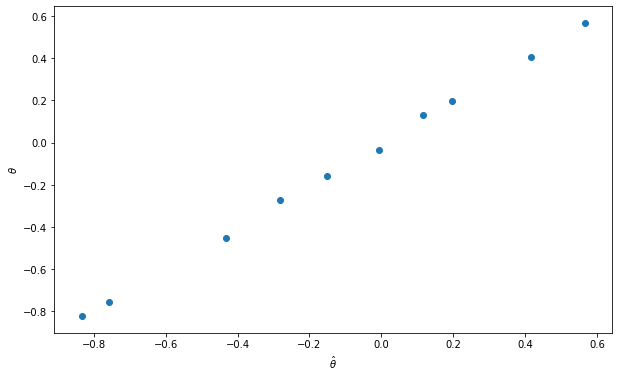

In [4]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax.scatter(pmle.theta, theta)
ax.set(xlabel='$\hat{\\theta}$', ylabel='$\\theta$')
plt.show()

#### 2.1.2) Compute MLE with IRLS

In [5]:
pmle = PoissonMLE(y, X)
pmle.irls()

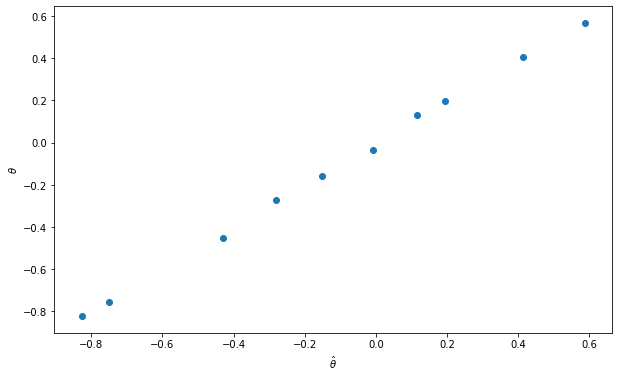

In [6]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax.scatter(pmle.theta, theta)
ax.set(xlabel='$\hat{\\theta}$', ylabel='$\\theta$')
plt.show()

### 2.2) Students and days, one more time

Again the example data is from here: https://www.theanalysisfactor.com/generalized-linear-models-in-r-part-6-poisson-regression-count-variables/ . This is the same data that we analyzed in `_1_poisson_statsmodels`. We only use IRLS this time, as gradient descent is unstable. We also compute the covariance matrix to show that the standard errors are exactly the same as those obtained with `statsmodels`.

In [7]:
days = [1, 2, 3, 3, 4, 4, 4, 6, 7, 8, 
        8, 8, 8, 12, 14, 15, 17, 17, 17, 18, 19, 19, 20, 
        23, 23, 23, 24, 24, 25, 26, 27, 28, 29, 34, 36, 36, 
        42, 42, 43, 43, 44, 44, 44, 44, 45, 46, 48, 48, 49, 
        49, 53, 53, 53, 54, 55, 56, 56, 58, 60, 63, 65, 67, 
        67, 68, 71, 71, 72, 72, 72, 73, 74, 74, 74, 75, 75, 
        80, 81, 81, 81, 81, 88, 88, 90, 93, 93, 94, 95, 95, 
        95, 96, 96, 97, 98, 100, 101, 102, 103, 104, 105, 
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115]

students = [6, 8, 12, 9, 3, 3, 11, 5, 7, 3, 8, 
            4, 6, 8, 3, 6, 3, 2, 2, 6, 3, 7, 7, 2, 2, 8, 
            3, 6, 5, 7, 6, 4, 4, 3, 3, 5, 3, 3, 3, 5, 3, 
            5, 6, 3, 3, 3, 3, 2, 3, 1, 3, 3, 5, 4, 4, 3, 
            5, 4, 3, 5, 3, 4, 2, 3, 3, 1, 3, 2, 5, 4, 3, 
            0, 3, 3, 4, 0, 3, 3, 4, 0, 2, 2, 1, 1, 2, 0, 
            2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 
            0, 1, 1, 0, 0, 0, 0, 0]

y = np.array(students).reshape(-1,1)
X = np.array([np.ones(len(days)), days]).T

learning_rate = 0.0001
theta_init = np.random.standard_normal((p+1,1))

In [8]:
pmle = PoissonMLE(y, X)

In [9]:
pmle.irls()

In [10]:
pmle.compute_cov()

In [11]:
out_df = pd.DataFrame(
    np.round(
    np.concatenate([pmle.theta, (np.sqrt(np.diag(pmle.covmat))).reshape(-1,1)],
                   axis=1),
    4), columns=['coef', 'std_err']
    )

In [12]:
out_df

,coef,std_err
0,1.9902,0.0839
1,-0.0175,0.0017
